In [53]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [54]:
# 2 painters simple convnet

In [55]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(412, 550, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-2]:
    layer.trainable = False

data_augmentation = keras.Sequential([
    # layers.RandomCrop(412, 550),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomContrast(.2),
    layers.RandomBrightness(.1),
    layers.RandomFlip("horizontal_and_vertical")
])


def create_simpleconvnet():
    inputs = keras.Input(shape=(412, 550, 3))
    x = data_augmentation(inputs)
    x = keras.applications.vgg16.preprocess_input(x)
    x = conv_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=1e-9), metrics=["accuracy"])

    model.summary()

    return model

In [56]:
model = create_simpleconvnet()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 412, 550, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 412, 550, 3)       0         
                                                                 
 tf.__operators__.getitem_5  (None, 412, 550, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_5 (TFOpLamb  (None, 412, 550, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 12, 17, 512)       14714688  
                                                                 
 flatten_5 (Flatten)         (None, 104448)            0   

In [57]:
#mix arrays per n elements

def mix(elements1:[], elements2:[], n=5):
    objects_set = []
    labels_set = []
    i = 0
    while i < len(elements1) and i < len(elements2):
            objects_set.append(np.reshape(elements1[i], (412, 550, 3)))
            labels_set.append([1, 0])
    
            objects_set.append(np.reshape(elements2[i], (412, 550, 3)))
            labels_set.append([0, 1])
            
            i+=1
            
    return np.array(objects_set), np.array(labels_set)
    

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 11.8186 - accuracy: 0.2750INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 11.8186 - accuracy: 0.2750 - val_loss: 10.2003 - val_accuracy: 0.2958
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 12.1846 - accuracy: 0.3250INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 12.1846 - accuracy: 0.3250 - val_loss: 9.3009 - val_accuracy: 0.3042
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 13.3564 - accuracy: 0.2250INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 13.3564 - accuracy: 0.2250 - val_loss: 8.6450 - val_accuracy: 0.3167
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 10.6513 - accuracy: 0.2500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 10.6513 - accuracy: 0.2500 - val_loss: 8.1387 - val_accuracy: 0.3458
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 7.7676 - accuracy: 0.4875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 7.7676 - accuracy: 0.4875 - val_loss: 7.7699 - val_accuracy: 0.3542
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 10.0770 - accuracy: 0.3500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 10.0770 - accuracy: 0.3500 - val_loss: 7.4933 - val_accuracy: 0.3625
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 9.8295 - accuracy: 0.3375INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 9.8295 - accuracy: 0.3375 - val_loss: 7.2689 - val_accuracy: 0.3917
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 8.2797 - accuracy: 0.4000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 8.2797 - accuracy: 0.4000 - val_loss: 7.0208 - val_accuracy: 0.4042
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 9.3236 - accuracy: 0.4375INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 9.3236 - accuracy: 0.4375 - val_loss: 6.7734 - val_accuracy: 0.4250
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 10.6381 - accuracy: 0.4250INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 10.6381 - accuracy: 0.4250 - val_loss: 6.5874 - val_accuracy: 0.4250
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 6.2542 - accuracy: 0.4500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 6.2542 - accuracy: 0.4500 - val_loss: 6.4032 - val_accuracy: 0.4458
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 8.7503 - accuracy: 0.3500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 8.7503 - accuracy: 0.3500 - val_loss: 6.2094 - val_accuracy: 0.4583
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 7.0377 - accuracy: 0.4500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 7.0377 - accuracy: 0.4500 - val_loss: 5.9965 - val_accuracy: 0.4708
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 7.0431 - accuracy: 0.5250INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 7.0431 - accuracy: 0.5250 - val_loss: 5.8078 - val_accuracy: 0.4875
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 7.3611 - accuracy: 0.4125INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 7.3611 - accuracy: 0.4125 - val_loss: 5.7092 - val_accuracy: 0.4875
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 7.0153 - accuracy: 0.5375INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 7.0153 - accuracy: 0.5375 - val_loss: 5.6045 - val_accuracy: 0.4958
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 7.5090 - accuracy: 0.4500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 7.5090 - accuracy: 0.4500 - val_loss: 5.4669 - val_accuracy: 0.5125
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 7.4094 - accuracy: 0.4000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 7.4094 - accuracy: 0.4000 - val_loss: 5.2810 - val_accuracy: 0.5250
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 5.9349 - accuracy: 0.4750INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 5.9349 - accuracy: 0.4750 - val_loss: 5.1678 - val_accuracy: 0.5208
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 5.5115 - accuracy: 0.5625INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.5115 - accuracy: 0.5625 - val_loss: 5.0658 - val_accuracy: 0.5375
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 7.2493 - accuracy: 0.4750INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 7.2493 - accuracy: 0.4750 - val_loss: 4.9770 - val_accuracy: 0.5500
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 4.5719 - accuracy: 0.5875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 4.5719 - accuracy: 0.5875 - val_loss: 4.8559 - val_accuracy: 0.5458
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 5.9913 - accuracy: 0.5625INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.9913 - accuracy: 0.5625 - val_loss: 4.7937 - val_accuracy: 0.5625
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 5.7523 - accuracy: 0.5875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.7523 - accuracy: 0.5875 - val_loss: 4.7580 - val_accuracy: 0.5750
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 5.7807 - accuracy: 0.5750INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.7807 - accuracy: 0.5750 - val_loss: 4.7001 - val_accuracy: 0.5792
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 5.7676 - accuracy: 0.4750INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.7676 - accuracy: 0.4750 - val_loss: 4.6045 - val_accuracy: 0.5833
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 4.2376 - accuracy: 0.5875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 4.2376 - accuracy: 0.5875 - val_loss: 4.5661 - val_accuracy: 0.5875
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 4.9842 - accuracy: 0.5875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 4.9842 - accuracy: 0.5875 - val_loss: 4.5384 - val_accuracy: 0.5917
Epoch 29/50
8/8 [==============================] - 36s 5s/step - loss: 4.9695 - accuracy: 0.6375 - val_loss: 4.5848 - val_accuracy: 0.6042
Epoch 30/50
8/8 [==============================] - 36s 5s/step - loss: 4.0269 - accuracy: 0.5625 - val_loss: 4.5941 - val_accuracy: 0.6083
Epoch 31/50
8/8 [==============================] - 36s 5s/step - loss: 4.4191 - accuracy: 0.5250 - val_loss: 4.6499 - val_accuracy: 0.6125
Epoch 32/50
8/8 [==============================] - 36s 5s/step - loss: 4.1761 - accuracy: 0.6750 - val_loss: 4.5556 - val_accuracy: 0.6208
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 4.2504 - accuracy: 0.6875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 4.2504 - accuracy: 0.6875 - val_loss: 4.4908 - val_accuracy: 0.6250
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 5.0096 - accuracy: 0.5875INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.0096 - accuracy: 0.5875 - val_loss: 4.3975 - val_accuracy: 0.6292
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 4.5785 - accuracy: 0.6250INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 4.5785 - accuracy: 0.6250 - val_loss: 4.2881 - val_accuracy: 0.6375
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 5.4915 - accuracy: 0.6000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 5.4915 - accuracy: 0.6000 - val_loss: 4.2767 - val_accuracy: 0.6458
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 3.8484 - accuracy: 0.5625INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 3.8484 - accuracy: 0.5625 - val_loss: 4.1957 - val_accuracy: 0.6500
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 4.5144 - accuracy: 0.6500INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 4.5144 - accuracy: 0.6500 - val_loss: 4.0973 - val_accuracy: 0.6417
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 3.8223 - accuracy: 0.6375INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 37s 5s/step - loss: 3.8223 - accuracy: 0.6375 - val_loss: 3.9793 - val_accuracy: 0.6375
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 4.1665 - accuracy: 0.7000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


8/8 [==============================] - 38s 5s/step - loss: 4.1665 - accuracy: 0.7000 - val_loss: 3.9372 - val_accuracy: 0.6417
Epoch 41/50
8/8 [==============================] - 36s 5s/step - loss: 3.4559 - accuracy: 0.6625 - val_loss: 3.9487 - val_accuracy: 0.6375
Epoch 42/50
8/8 [==============================] - 37s 5s/step - loss: 2.6505 - accuracy: 0.7000 - val_loss: 4.0073 - val_accuracy: 0.6542
Epoch 43/50
8/8 [==============================] - 37s 5s/step - loss: 4.7109 - accuracy: 0.5750 - val_loss: 4.0610 - val_accuracy: 0.6667
Epoch 44/50
8/8 [==============================] - 37s 5s/step - loss: 2.5207 - accuracy: 0.6750 - val_loss: 4.1180 - val_accuracy: 0.6667
Epoch 45/50
8/8 [==============================] - 36s 5s/step - loss: 3.3375 - accuracy: 0.6500 - val_loss: 4.0792 - val_accuracy: 0.6708
Epoch 46/50
8/8 [==============================] - 36s 5s/step - loss: 2.5584 - accuracy: 0.7500 - val_loss: 4.0371 - val_accuracy: 0.6708
Epoch 47/50
8/8 [======================

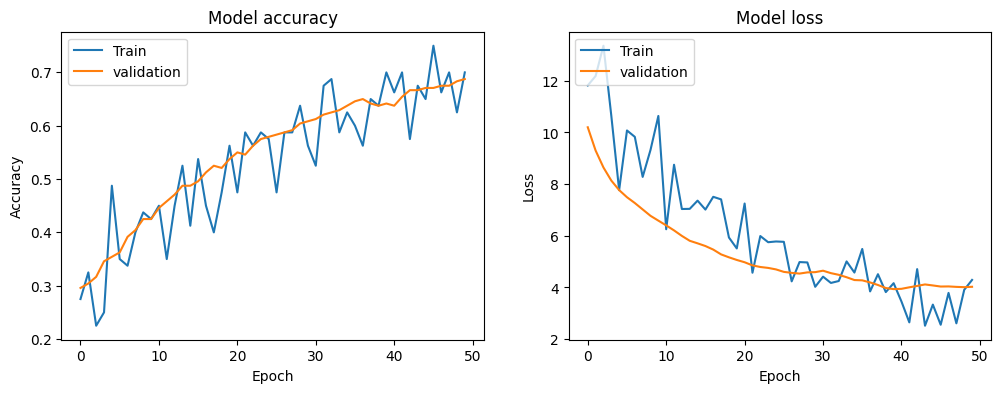

In [58]:
import itertools

cwd = os.getcwd()

dir_train_rubens = "dataset/train/rubens"
dir_train_picasso= "dataset/train/picasso"
dir_train_mondriaan= "dataset/train/mondriaan"
dir_train_rembrandt= "dataset/train/rembrandt"
dir_validation_rubens = "dataset/validation/rubens"
dir_validation_picasso= "dataset/validation/picasso"
dir_validation_mondriaan= "dataset/validation/mondriaan"
dir_validation_rembrandt= "dataset/validation/rembrandt"
file_train_rubens = os.listdir(dir_train_rubens)
file_validation_rubens = os.listdir(dir_validation_rubens)
file_train_picasso = os.listdir(dir_train_picasso)
file_validation_picasso = os.listdir(dir_validation_picasso)
file_train_mondriaan = os.listdir(dir_train_mondriaan)
file_validation_mondriaan = os.listdir(dir_validation_mondriaan)
file_train_rembrandt = os.listdir(dir_train_rembrandt)
file_validation_rembrandt = os.listdir(dir_validation_rembrandt)

train_rubens =[Image.open(os.path.join(dir_train_rubens, file)) for file in file_train_rubens]
train_picasso =[Image.open(os.path.join(dir_train_picasso, file)) for file in file_train_picasso]
train_mondriaan =[Image.open(os.path.join(dir_train_mondriaan, file)) for file in file_train_mondriaan]
train_rembrandt =[Image.open(os.path.join(dir_train_rembrandt, file)) for file in file_train_rembrandt]

validation_rubens = [Image.open(os.path.join(dir_validation_rubens, file)) for file in file_validation_rubens]
validation_picasso = [Image.open(os.path.join(dir_validation_picasso, file)) for file in file_validation_picasso]
validation_mondriaan = [Image.open(os.path.join(dir_validation_mondriaan, file)) for file in file_validation_mondriaan]
validation_rembrandt = [Image.open(os.path.join(dir_validation_rembrandt, file)) for file in file_validation_rembrandt]

data_val_rubens = []
data_val_picasso = []
data_val_mondriaan = []
data_val_rembrandt = []

for val in validation_rubens:
    data_val_rubens.append((np.array(val), np.array([0,0,0,1])))

for val in validation_picasso:
    data_val_picasso.append((np.array(val), np.array([0,0,1,0])))

for val in validation_mondriaan:
    data_val_mondriaan.append((np.array(val), np.array([0,1,0,0])))

for val in validation_rembrandt:
    data_val_rembrandt.append((np.array(val), np.array([1,0,0,0])))

data_train_rubens = []
data_train_picasso = []
data_train_mondriaan = []
data_train_rembrandt = []

for val in train_rubens:
    data_train_rubens.append((np.array(val), np.array([0,0,0,1])))

for val in train_picasso:
    data_train_picasso.append((np.array(val), np.array([0,0,1,0])))

for val in train_mondriaan:
    data_train_mondriaan.append((np.array(val), np.array([0,1,0,0])))

for val in train_rembrandt:
    data_train_rembrandt.append((np.array(val), np.array([1,0,0,0])))

data_validation = data_val_rubens + data_val_picasso + data_val_mondriaan + data_val_rembrandt
data_train = data_train_rubens + data_train_picasso + data_train_mondriaan + data_train_rembrandt

mixed_data_validation = list(itertools.chain.from_iterable(itertools.zip_longest(data_val_rubens, data_val_picasso, data_val_mondriaan, data_val_rembrandt)))
mixed_data_train = list(itertools.chain.from_iterable(itertools.zip_longest(data_train_rubens, data_train_picasso, data_train_mondriaan, data_train_rembrandt)))

train_set, train_labels = [list(i) for i in zip(*mixed_data_validation)]
validation_set, validation_labels = [list(i) for i in zip(*mixed_data_train)]

train_set = [sublist for sublist in train_set]
validation_set = [sublist for sublist in validation_set]

train_set = np.array(train_set).reshape(len(train_set), 412, 550, 3)
validation_set = np.array(validation_set).reshape(len(validation_set), 412, 550, 3)

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="convnet_pretrained_augmentation.tf", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5) #Stoppen bij gebrek aan verbetering
    ]

history = model.fit(train_set, np.array(train_labels), validation_data=(validation_set, np.array(validation_labels)), epochs=100, batch_size=10, callbacks=callbacks)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')

plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler

model = keras.models.load_model('convnet_pretrained_augmentation.tf')

layer_output = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_output.append(layer.output)
        layer_names.append(layer.name)
        
activation_model = keras.Model(inputs=model.input, outputs=layer_output)

img_path = Image.open("dataset/test/picasso/1468.jpg")
img_path = np.reshape(img_path, (412, 550, 3))
img_path = np.expand_dims(img_path, axis=0)

# img_path , _ = get_features_and_labels(img_path, None)
print(img_path.shape)
activations = activation_model.predict(img_path)

images_per_row = 4
for layer_name, layer_activations in zip(layer_names, activations):
    n_features = layer_activations.shape[-1]
    height = layer_activations.shape[2]
    width = layer_activations.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((width + 1) * n_cols - 1, images_per_row * (height + 1) - 1))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            chanal_index = col * images_per_row + row
            channel_img = layer_activations[0, :, :, chanal_index].copy()
            
            if channel_img.sum() != 0:
                channel_img -= channel_img.mean()
                channel_img /= channel_img.std()
                channel_img *= 64
                channel_img += 128

            channel_img = np.clip(channel_img, 0, 255).astype(np.uint8)

            display_grid[
                col * (width + 1) : (col + 1) * width + col, 
                row * (height + 1) : (row + 1) * height + row
            ] = channel_img

    scale_width = 1.0 / width
    scale_height = 1.0 / height
    plt.figure(figsize=(scale_height * display_grid.shape[1],scale_width * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


(1, 412, 550, 3)
1/1 [==============================] - 0s 26ms/step


IndexError: list index out of range

In [ ]:
cwd = os.getcwd()
dir_test_rubens = "dataset/test/rubens"
dir_test_picasso= "dataset/test/picasso"
file_test_rubens = os.listdir(dir_test_rubens)
file_test_picasso = os.listdir(dir_test_picasso)

test_rubens = [Image.open(os.path.join(dir_test_rubens, file)) for file in file_validation_rubens]
test_picasso = [Image.open(os.path.join(dir_test_picasso, file)) for file in file_test_picasso]

test_set, test_labels = mix(test_rubens, test_picasso)

test_set = test_set.reshape(len(test_set), 412, 550, 3)

test_model = keras.models.load_model('convnet_pretrained_augmentation.tf')
test_loss, test_acc = test_model.evaluate(test_set, test_labels)
print('Test loss:', test_loss)